Xây dựng mạng ANN phân lớp fashion. Khai báo các gói numpy, mnist, keras
https://victorzhou.com/blog/keras-neural-network-tutorial/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
#from keras.datasets import mnist
from keras.datasets import fashion_mnist


Lấy dữ liệu từ mnist. Có 2 tập train và test


In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Có 60000 ảnh train và 10000 ảnh để test

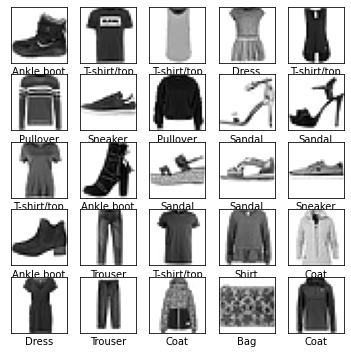

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(6,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

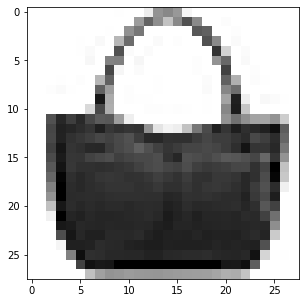

In [5]:
plt.figure(figsize=(5,5))
plt.imshow(train_images[100], cmap=plt.cm.binary)
plt.show()


In [6]:
# Normalize the images.
train_images = (train_images / 255)
test_images = (test_images / 255)

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))


Mạng có 1 lớp vào 784 nút, 2 lớp ẩn mỗi lớp 64 nút, 1 lớp ra 10 nút. Các hàm kích hoạt là relu và softmax

In [7]:
# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

Huấn luyện mạng 

In [10]:
history=model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=100,
  batch_size=32,
)

Epoch 1/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5071 - accuracy: 0.8203
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3774 - accuracy: 0.8617
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3449 - accuracy: 0.8724
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3215 - accuracy: 0.8805
Epoch 5/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3045 - accuracy: 0.8870
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2904 - accuracy: 0.8910
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2779 - accuracy: 0.8968
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2685 - accuracy: 0.9006
Epoch 9/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2589 - accuracy: 0.9032
Epoch 10/100
1875/1875 [==============================] - 3s 1ms/step - l

In [11]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


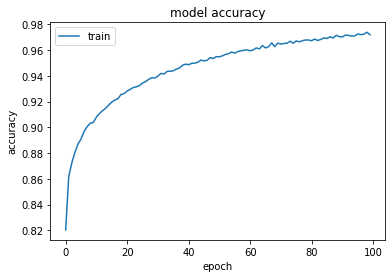

In [12]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

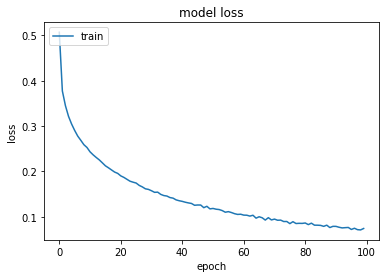

In [13]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 0s 606us/step - loss: 0.7859 - accuracy: 0.8818


[0.7859055995941162, 0.8817999958992004]

In [15]:
import keras
model.save('model.h5')

In [16]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:10])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:10]) # [7, 2, 1, 0, 4]

[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


Thử lấy model đã lưu trong model.h5 - không phải đào tạo lại

In [17]:
predictions

array([[1.8486431e-31, 4.9433352e-25, 3.4697556e-36, 3.2325776e-28,
        3.1474793e-24, 4.7308436e-08, 0.0000000e+00, 6.0918311e-13,
        1.6192451e-38, 1.0000000e+00],
       [2.9345384e-10, 0.0000000e+00, 1.0000000e+00, 1.0695823e-23,
        7.4309843e-09, 9.2066111e-36, 5.1045262e-10, 0.0000000e+00,
        1.8707153e-28, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 2.0150755e-38,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 2.6557052e-17,
        1.7195678e-36, 1.0047306e-36, 2.5021068e-23, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.7109016e-02, 3.2428805e-27, 5.6481879e-04, 3.5418232e-10,
        1.0336162e-05, 5.0217465e-29, 9.2231584e-01, 5.5580610e-28,
        3.4690883e-17, 5.0275852e-32],
       [5.7219623e-31, 1.0000000e+00, 0.0000000e+00, 5.3625469e-31,
        0.0000000e+00, 0.0000000e+00, 7.8040335e-32, 0.00

In [18]:
# Load the model's saved weights.
#model1= model.load_weights('model.h5')

model1= keras.models.load_model('model.h5')


In [19]:
#@tf.autograph.experimental.do_not_convert
# Predict on the first 5 test images.
predictions = model1.predict(test_images[:50])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:50]) # [7, 2, 1, 0, 4]

[9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 2 8 0 2 5 7 5 1 2 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 0 1 6 9 6 7 2 1 2 6]
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2]
